<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/5_2_Linear_Classifiers_in_Python_Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-2 Linear Classifiers in Python - Loss functions

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from mlxtend.plotting import plot_decision_regions

## Linear classifiers: the coefficients

### Dot Product

In [2]:
x = np.arange(3)
y = np.arange(3, 6)
display(x)
display(y)

array([0, 1, 2])

array([3, 4, 5])

In [3]:
x.dot(y)

14

In [4]:
sum([x * y for x, y in zip(x, y)])

14

In [5]:
(x * y).sum()

14

In [6]:
x @ y

14

### Linear classifier prediction

- $\text{raw model output} = \text{coefficients} \cdot \text{features} + \text{intercept}$
- Linear classifier prediction: compute raw model output, check the **sign**
    - If positive, predict one class
    - If negative, predict the other class
- This is the same for **logistic regression** and **linear SVM**
    - `fit` is different, but `predict` is the same

In [7]:
breast_cancer = datasets.load_breast_cancer()

display(breast_cancer.feature_names)
display(breast_cancer.target_names)

X, y = breast_cancer.data, breast_cancer.target
X.shape, y.shape

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

array(['malignant', 'benign'], dtype='<U9')

((569, 30), (569,))

In [8]:
# 0: malignant, 1: benign
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [9]:
lr = LogisticRegression()
lr.fit(X, y)
lr.predict(X)[10], lr.predict(X)[20]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0, 1)

In [10]:
lr.coef_ @ X[10] + lr.intercept_ # raw model output < 0, predict 0

array([-6.97985431])

In [11]:
lr.coef_ @ X[20] + lr.intercept_ # raw model output >= 0, predict 1

array([5.51184068])

In [12]:
# prediction by raw model
raw_model_output = X @ lr.coef_.T + lr.intercept_
prediction = raw_model_output >= 0
prediction = prediction.astype(int).flatten()
prediction == lr.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Changing the model coefficients

In [13]:
X = np.array([
       [ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

X.shape, y.shape

((20, 2), (20,))

In [14]:
model_coef_ = np.array([0, 1])
model_intercept_ = np.array([0])

raw_model_output = X @ model_coef_ + model_intercept_
predictions = raw_model_output
predictions = np.where(predictions >= 0, 1, -1)

predictions

array([ 1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1])

The decision boundary is the line where $w \cdot x + b = 0$

In [15]:
x1, x2 = sp.symbols('x1 x2')
w1, w2 = sp.symbols('w1 w2')
b = sp.symbols('b')

decision_boundary = sp.Eq(w1 * x1 + w2 * x2 + b, 0)
decision_boundary

Eq(b + w1*x1 + w2*x2, 0)

In [16]:
decision_boundary.subs({w1:0, w2:1, b:0})

Eq(x2, 0)

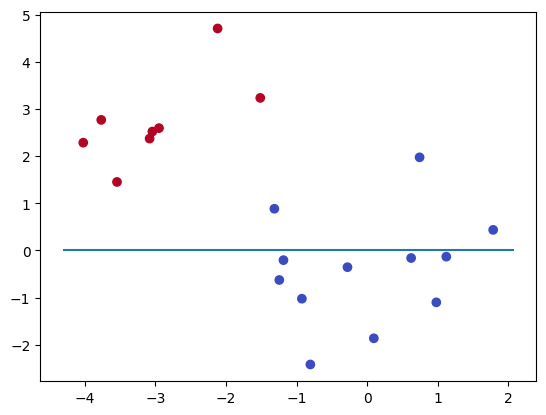

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.hlines(0, xmin=plt.xlim()[0], xmax=plt.xlim()[1])

plt.show()

In [18]:
# we can see in the above graph that there
#. are 3 points on the wrong side of the
#. decision boundary
np.sum(y != predictions)

3

In [19]:
# attempt to get 0 errors
model_coef_ = np.array([-1, 1])
model_intercept_ = np.array([-2.5])

raw_model_output = X @ model_coef_ + model_intercept_
predictions = raw_model_output
predictions = np.where(predictions >= 0, 1, -1)

predictions

array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [20]:
decision_boundary.subs({w1:-1, w2:1, b:-2.5})

Eq(-x1 + x2 - 2.5, 0)

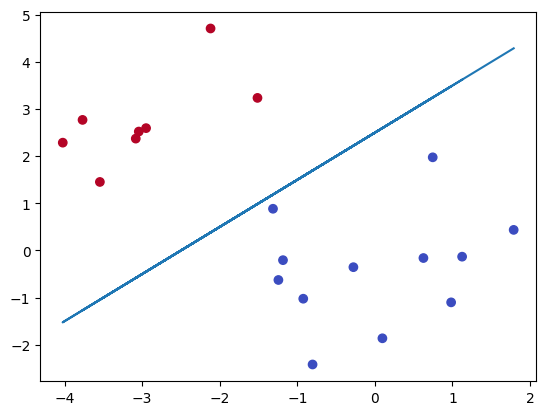

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(X[:, 0], X[:, 0] + 2.5)

plt.show()

In [22]:
# no errors
np.sum(y != predictions)

0

### Trying that data with Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [24]:
lr.coef_, lr.intercept_

(array([[-1.12566322,  1.1091444 ]]), array([-3.59041016]))

In [25]:
raw_model_output = X @ lr.coef_.T + lr.intercept_
raw_model_output

array([[-5.11965099],
       [-5.76591631],
       [-3.6716434 ],
       [ 2.51171746],
       [ 2.63403351],
       [-1.13026697],
       [ 4.01810879],
       [ 2.608846  ],
       [ 2.01263769],
       [-5.91746805],
       [-2.4845423 ],
       [ 1.70366268],
       [ 3.47563758],
       [-4.47225792],
       [ 3.72432623],
       [-2.2373004 ],
       [-2.88473309],
       [-5.36875278],
       [-3.68615752],
       [-5.00194274]])

In [26]:
predictions = np.where(raw_model_output >= 0, 1, -1)
predictions = predictions.flatten()
predictions == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

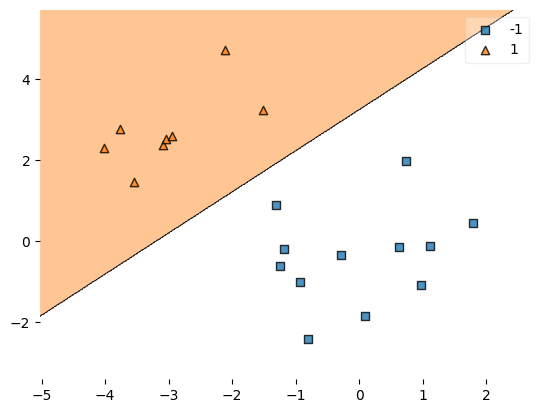

In [28]:
plot_decision_regions(X, y, lr);

## What is a loss function?